In [1]:
import re

In [2]:
# Enable rpy2
%load_ext rpy2.ipython

### Qualitative exploration on `Answer:`

In [3]:
text_samp = []
with open('../data/gpt-4/pubmed_gpt-4.sampled.txt', 'r') as f:
    for line in f:
        text_samp.append(line.strip())
model_yes_count, model_no_count = 0, 0
model_yesno_indices = []
for i, text in enumerate(text_samp):
    if re.search(r'Answer: Yes', text, re.IGNORECASE):
        model_yes_count += 1
        model_yesno_indices.append(i)
    elif re.search(r'Answer: No', text, re.IGNORECASE):
        model_no_count += 1
        model_yesno_indices.append(i)
print('model yes count: ', model_yes_count)
print('model no count: ', model_no_count)

text_orig = []
with open('../data/gpt-4/pubmed_gpt-4.original.txt', 'r') as f:
    for line in f:
        text_orig.append(line.strip())
human_yes_count, human_no_count = 0, 0
for text in text_orig:
    if re.search(r'Answer: Yes', text, re.IGNORECASE):
        human_yes_count += 1
    if re.search(r'Answer: No', text, re.IGNORECASE):
        human_no_count += 1
print('human yes count: ', human_yes_count)
print('human no count: ', human_no_count)

# GPT-4, There are 78 out of 150 generated answers that start with "Yes, "
#   10 out of 150 start with "No, "
# 0 out of 150 human answers do

# Record the line indices that contain yes/no
with open('gpt-4_yesno_line_indices.txt', 'w') as f:
    f.write(' '.join(map(str, model_yesno_indices)))

model yes count:  78
model no count:  10
human yes count:  0
human no count:  0


In [4]:
# gpt-3.5_turbo yes count

text_samp = []
with open('../data/gpt-3.5/pubmed_gpt-3.5-turbo.sampled.txt', 'r') as f:
    for line in f:
        text_samp.append(line.strip())
model_yes_count, model_no_count = 0, 0
model_yesno_indices = []
for i, text in enumerate(text_samp):
    if re.search(r'Answer: Yes', text, re.IGNORECASE):
        model_yes_count += 1
        model_yesno_indices.append(i)
    elif re.search(r'Answer: No', text, re.IGNORECASE):
        model_no_count += 1
        model_yesno_indices.append(i)
print('model yes count: ', model_yes_count)
print('model no count: ', model_no_count)

text_orig = []
with open('../data/gpt-3.5/pubmed_gpt-3.5-turbo.original.txt', 'r') as f:
    for line in f:
        text_orig.append(line.strip())
human_yes_count, human_no_count = 0, 0
for text in text_orig:
    if re.search(r'Answer: Yes', text, re.IGNORECASE):
        human_yes_count += 1
    if re.search(r'Answer: No', text, re.IGNORECASE):
        human_no_count += 1
print('human yes count: ', human_yes_count)
print('human no count: ', human_no_count)

# Record the line indices that contain yes/no
with open('gpt-3.5_yesno_line_indices.txt', 'w') as f:
    f.write(' '.join(map(str, model_yesno_indices)))

model yes count:  35
model no count:  2
human yes count:  0
human no count:  0


In [5]:
# GPT-3/davinci yes count

text_samp = []
with open('../data/davinci/pubmed_davinci.sampled.txt', 'r') as f:
    for line in f:
        text_samp.append(line.strip())
model_yes_count, model_no_count = 0, 0
model_yesno_indices = []
for i, text in enumerate(text_samp):
    if re.search(r'Answer: Yes', text, re.IGNORECASE):
        model_yes_count += 1
        model_yesno_indices.append(i)
    elif re.search(r'Answer: No', text, re.IGNORECASE):
        model_no_count += 1
        model_yesno_indices.append(i)
print('model yes count: ', model_yes_count)
print('model no count: ', model_no_count)

text_orig = []
with open('../data/davinci/pubmed_davinci.original.txt', 'r') as f:
    for line in f:
        text_orig.append(line.strip())
human_yes_count, human_no_count = 0, 0
for text in text_orig:
    if re.search(r'Answer: Yes', text, re.IGNORECASE):
        human_yes_count += 1
    if re.search(r'Answer: No', text, re.IGNORECASE):
        human_no_count += 1
print('human yes count: ', human_yes_count)
print('human no count: ', human_no_count)

# Record the line indices that contain yes/no
with open('gpt-3_yesno_line_indices.txt', 'w') as f:
    f.write(' '.join(map(str, model_yesno_indices)))

model yes count:  32
model no count:  32
human yes count:  0
human no count:  0


### Create text data without `Yes/No` in `Answer:`


In [ ]:
text_samp
for text in text_samp:
    if re.search(r'Answer: Yes', text, re.IGNORECASE):
        print(text)
        break

new_text = re.sub(r'(?<=Answer: )Yes[,|.]*', '', text)
print(new_text)

Question: Is coeliac disease screening in risk groups justified? Answer: Yes. Read on for details and an offer of a free book!
Question: Is coeliac disease screening in risk groups justified? Answer:  Read on for details and an offer of a free book!


In [ ]:
# samp_file = '../data/gpt-4/pubmed_gpt-4.sampled.txt'
# new_samp_file = '../data/gpt-4/pubmed_gpt-4.sampled.rmyesno.txt'

# samp_file = '../data/gpt-3.5/pubmed_gpt-3.5-turbo.sampled.txt'
# new_samp_file = '../data/gpt-3.5/pubmed_gpt-3.5-turbo.sampled.rmyesno.txt'

samp_file = '../data/davinci/pubmed_davinci.sampled.txt'
new_samp_file = '../data/davinci/pubmed_davinci.sampled.rmyesno.txt'

with open(samp_file, 'r') as f, open(new_samp_file, 'w') as f2:
    for line in f:
        if re.search(r'Answer: Yes', line, re.IGNORECASE):
            new_line = re.sub(r'(?<=Answer: )Yes[,|.]*', '', line)
        elif re.search(r'Answer: No', line, re.IGNORECASE):
            new_line = re.sub(r'(?<=Answer: )No[,|.]*', '', line)
        else:
            new_line = line
        f2.write(new_line)

### Spectrum plots comparing with and without `Yes/No`

In [3]:
with open('gpt-4_yesno_line_indices.txt', 'r') as f:
    gpt4_yesno_indices = list(map(int, f.readline().strip().split()))
print(len(gpt4_yesno_indices))

with open('gpt-3.5_yesno_line_indices.txt', 'r') as f:
    chatgpt_yesno_indices = list(map(int, f.readline().strip().split()))
print(len(chatgpt_yesno_indices))

with open('gpt-3_yesno_line_indices.txt', 'r') as f:
    davinci_yesno_indices = list(map(int, f.readline().strip().split()))
print(len(davinci_yesno_indices))

88
37
64


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


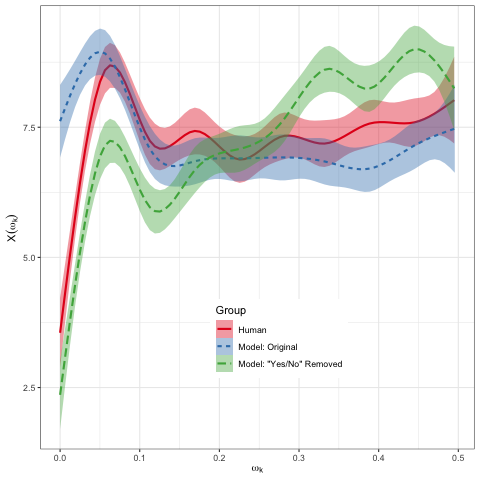

In [40]:
%%R -i gpt4_yesno_indices
# Plot spectrum before and after removing "Yes, " and "No, "
# GPT-4
require("data.table")
require("ggplot2")

d.model <- fread("../data/gpt-4/pubmed_gpt-4.sampled.gpt2xl.nllzs.fftnorm.txt")
d.model$Group <- "Model: Original"
d.model.rm <- fread("../data/gpt-4/pubmed_gpt-4.sampled.rmyesno.gpt2xl.nllzs.fftnorm.txt")
d.model.rm$Group <- "Model: \"Yes/No\" Removed"
d.human <- fread("../data/gpt-4/pubmed_gpt-4.original.gpt2xl.nllzs.fftnorm.txt")
d.human$Group <- "Human"

# Only include rows matching yes/no indices
d.model <- d.model[sid %in% gpt4_yesno_indices]
d.model.rm <- d.model.rm[sid %in% gpt4_yesno_indices]
d.human <- d.human[sid %in% gpt4_yesno_indices]

dt <- rbind(d.model, d.model.rm, d.human)
dt$Group <- factor(dt$Group, levels=c("Human", "Model: Original", "Model: \"Yes/No\" Removed"))

p <- ggplot(dt, aes(x=freq, y=power)) + 
    geom_smooth(aes(fill=Group, colour=Group, linetype=Group)) + 
    theme_bw() + theme(legend.position=c(.55,.25)) +
    scale_color_brewer(palette="Set1") + scale_fill_brewer(palette="Set1") +
    labs(x = bquote(omega[k]), y = bquote(X(omega[k])))
ggsave("pubmed_gpt-4_rmyesno.pdf", plot=p, width=3, height=3)
plot(p)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


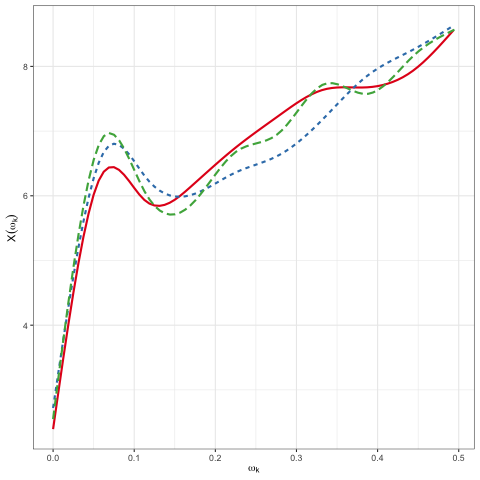

In [48]:
%%R -i chatgpt_yesno_indices 
# Plot spectrum before and after removing "Yes, " and "No, "
# GPT-3.5
require("data.table")
require("ggplot2")

d.model <- fread("../data/gpt-3.5/pubmed_gpt-3.5-turbo.sampled.gpt2xl.nllzs.fftnorm.txt")
d.model$Group <- "Model: Original"
d.model.rm <- fread("../data/gpt-3.5/pubmed_gpt-3.5-turbo.sampled.rmyesno.gpt2xl.nllzs.fftnorm.txt")
d.model.rm$Group <- "Model: \"Yes/No\" Removed"
d.human <- fread("../data/gpt-3.5/pubmed_gpt-3.5-turbo.original.gpt2xl.nllzs.fftnorm.txt")
d.human$Group <- "Human"

# Only include rows matching yes/no indices
d.model <- d.model[sid %in% chatgpt_yesno_indices]
d.model.rm <- d.model.rm[sid %in% chatgpt_yesno_indices]
d.human <- d.human[sid %in% chatgpt_yesno_indices]

dt <- rbind(d.model, d.model.rm, d.human)
dt$Group <- factor(dt$Group, levels=c("Human", "Model: Original", "Model: \"Yes/No\" Removed"))

p <- ggplot(dt, aes(x=freq, y=power)) + 
    geom_smooth(aes(colour=Group, linetype=Group), se=F) + 
    theme_bw() + theme(legend.position="none") +
    scale_color_brewer(palette="Set1") + scale_fill_brewer(palette="Set1") +
    labs(x = bquote(omega[k]), y = bquote(X(omega[k])))
ggsave("pubmed_gpt-3.5_rmyesno.pdf", plot=p, width=3, height=3)
plot(p)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


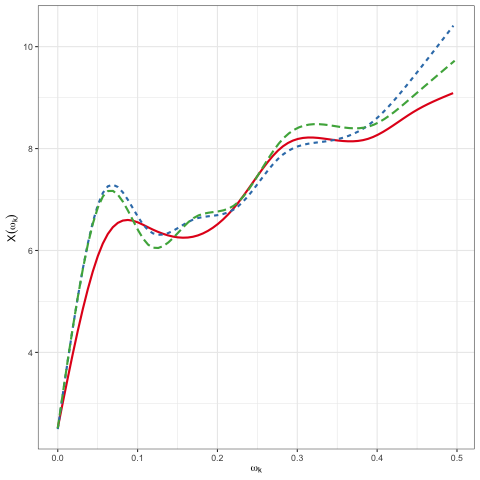

In [46]:
%%R -i davinci_yesno_indices
# Plot spectrum before and after removing "Yes, " and "No, "
# GPT-4
require("data.table")
require("ggplot2")

d.model <- fread("../data/davinci/pubmed_davinci.sampled.gpt2xl.nllzs.fftnorm.txt")
d.model$Group <- "Model: Original"
d.model.rm <- fread("../data/davinci/pubmed_davinci.sampled.rmyesno.gpt2xl.nllzs.fftnorm.txt")
d.model.rm$Group <- "Model: \"Yes/No\" Removed"
d.human <- fread("../data/davinci/pubmed_davinci.original.gpt2xl.nllzs.fftnorm.txt")
d.human$Group <- "Human"

# Only include rows matching yes/no indices
d.model <- d.model[sid %in% davinci_yesno_indices]
d.model.rm <- d.model.rm[sid %in% davinci_yesno_indices]
d.human <- d.human[sid %in% davinci_yesno_indices]

dt <- rbind(d.model, d.model.rm, d.human)
dt$Group <- factor(dt$Group, levels=c("Human", "Model: Original", "Model: \"Yes/No\" Removed"))
# print(nrow(dt))

p <- ggplot(dt, aes(x=freq, y=power)) + 
    geom_smooth(aes(colour=Group, linetype=Group), se=F) + 
    theme_bw() + theme(legend.position="none") +
    scale_color_brewer(palette="Set1") + scale_fill_brewer(palette="Set1") +
    labs(x = bquote(omega[k]), y = bquote(X(omega[k])))
ggsave("pubmed_gpt-3_rmyesno.pdf", plot=p, width=3, height=3)
plot(p)

### Plot likelihood against token position for `yes/no` contrast

In [4]:
import sys
sys.path.append('..')
from run_fft import FFTProcessor
import numpy as np
import pandas as pd
from collections import Counter

In [5]:
fft_processor = FFTProcessor(method='fft', 
                             preprocess='logzs', 
                             value='norm', 
                             require_sid=False)

In [6]:
# GPT-4 data
est_name = 'gpt2xl'
nll_human = fft_processor._read_data(data_file=f'../data/gpt-4/pubmed_gpt-4.original.{est_name}.nll.txt')
nll_model_rm = fft_processor._read_data(data_file=f'../data/gpt-4/pubmed_gpt-4.sampled.rmyesno.{est_name}.nll.txt')
nll_model = fft_processor._read_data(data_file=f'../data/gpt-4/pubmed_gpt-4.sampled.{est_name}.nll.txt')

# Z-Score NLL
fft_processor.preprocess = 'zscore'
data = fft_processor._preprocess(nll_human)
df_nllzs_human = fft_processor._create_input_df(data)
data = fft_processor._preprocess(nll_model_rm)
df_nllzs_model_rm = fft_processor._create_input_df(data)
data = fft_processor._preprocess(nll_model)
df_nllzs_model = fft_processor._create_input_df(data)

df_nllzs_human['Source'] = 'Human'
df_nllzs_model_rm['Source'] = 'Model: \"Yes/No\" Removed'
df_nllzs_model['Source'] = 'Model: Original'

In [18]:
%%R -i df_nllzs_human -i df_nllzs_model_rm -i df_nllzs_model -i gpt4_yesno_indices
require("data.table")
require("ggplot2")

# Add token position to df
dt.human <- data.table(df_nllzs_human)
dt.model <- data.table(df_nllzs_model)
dt.model.rm <- data.table(df_nllzs_model_rm)
# print(nrow(dt.human))
# print(nrow(dt.model))
# print(nrow(dt.model.rm))

dt.human <- dt.human[sid %in% gpt4_yesno_indices, tokenPos := 1:.N, by=sid]
dt.model <- dt.model[sid %in% gpt4_yesno_indices, tokenPos := 1:.N, by=sid]
dt.model.rm <- dt.model.rm[sid %in% gpt4_yesno_indices, tokenPos := 1:.N, by=sid]

dt <- rbind(dt.human, dt.model, dt.model.rm)
dt$Group <- factor(dt$Source, levels=c("Human", "Model: Original", "Model: \"Yes/No\" Removed"))

p <- ggplot(dt, aes(x=tokenPos, y=value)) + 
    geom_smooth(aes(fill=Group, colour=Group, linetype=Group)) + 
    theme_bw() + theme(legend.position=c(.56,.76)) +
    scale_color_brewer(palette="Set1") + scale_fill_brewer(palette="Set1") +
    labs(x = bquote(omega[k]), y = bquote(X(omega[k])))
ggsave("pubmed_gpt-4_rmyesno_nll.pdf", plot=p, width=3, height=3)
# plot(p)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


此外: Warning message:
Removed 12652 rows containing non-finite values (`stat_smooth()`). 


In [19]:
# GPT-3 data
est_name = 'gpt2xl'
nll_human = fft_processor._read_data(data_file=f'../data/davinci/pubmed_davinci.original.{est_name}.nll.txt')
nll_model_rm = fft_processor._read_data(data_file=f'../data/davinci/pubmed_davinci.sampled.rmyesno.{est_name}.nll.txt')
nll_model = fft_processor._read_data(data_file=f'../data/davinci/pubmed_davinci.sampled.{est_name}.nll.txt')

# Z-Score NLL
fft_processor.preprocess = 'zscore'
data = fft_processor._preprocess(nll_human)
df_nllzs_human = fft_processor._create_input_df(data)
data = fft_processor._preprocess(nll_model_rm)
df_nllzs_model_rm = fft_processor._create_input_df(data)
data = fft_processor._preprocess(nll_model)
df_nllzs_model = fft_processor._create_input_df(data)

df_nllzs_human['Source'] = 'Human'
df_nllzs_model_rm['Source'] = 'Model: \"Yes/No\" Removed'
df_nllzs_model['Source'] = 'Model: Original'

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


此外: Warning messages:
1: Removed 18153 rows containing non-finite values (`stat_smooth()`). 
2: Removed 18153 rows containing non-finite values (`stat_smooth()`). 


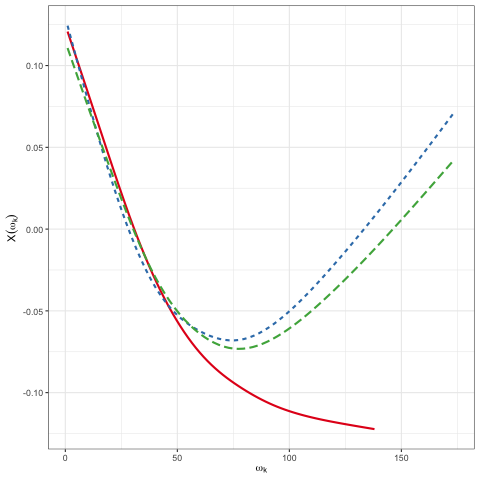

In [22]:
%%R -i df_nllzs_human -i df_nllzs_model_rm -i df_nllzs_model -i davinci_yesno_indices
require("data.table")
require("ggplot2")

# Add token position to df
dt.human <- data.table(df_nllzs_human)
dt.model <- data.table(df_nllzs_model)
dt.model.rm <- data.table(df_nllzs_model_rm)
# print(nrow(dt.human))
# print(nrow(dt.model))
# print(nrow(dt.model.rm))

dt.human <- dt.human[sid %in% davinci_yesno_indices, tokenPos := 1:.N, by=sid]
dt.model <- dt.model[sid %in% davinci_yesno_indices, tokenPos := 1:.N, by=sid]
dt.model.rm <- dt.model.rm[sid %in% davinci_yesno_indices, tokenPos := 1:.N, by=sid]

dt <- rbind(dt.human, dt.model, dt.model.rm)
dt$Group <- factor(dt$Source, levels=c("Human", "Model: Original", "Model: \"Yes/No\" Removed"))

p <- ggplot(dt, aes(x=tokenPos, y=value)) + 
    geom_smooth(aes(fill=Group, colour=Group, linetype=Group), se=F) + 
    theme_bw() + theme(legend.position="none") +
    scale_color_brewer(palette="Set1") + scale_fill_brewer(palette="Set1") +
    labs(x = bquote(omega[k]), y = bquote(X(omega[k])))
ggsave("pubmed_gpt-3_rmyesno_nll.pdf", plot=p, width=3, height=3)
plot(p)